In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

# Danh sách cạnh có hướng và trọng số
edges = [
    ('A', 'F', 2),
    ('B', 'C', 3),
    ('B', 'H', 4),
    ('B', 'D', 2),
    ('C', 'B', 3),
    ('C', 'D', 4),
    ('C', 'A', 1),
    ('D', 'A', 2),
    ('D', 'B', 2),
    ('D', 'E', 3),
    ('D', 'C', 2),
    ('E', 'D', 3),
    ('E', 'H', 3),
    ('E', 'F', 1),
    ('F', 'E', 1),
    ('F', 'A', 2),
    ('G', 'E', 1),
    ('G', 'F', 2),
    ('G', 'H', 1),
    ('H', 'G', 1),
    ('H', 'B', 4),
    ('H', 'E', 3),
]

# Xây dựng đồ thị dưới dạng adjacency list
graph = defaultdict(list)
nodes = set()
for u, v, w in edges:
    graph[u].append((v, w))
    nodes.add(u)
    nodes.add(v)



In [2]:
# Hàm Dijkstra
def dijkstra(graph, start):
    dist = {node: float('inf') for node in nodes}
    prev = {node: None for node in nodes}
    dist[start] = 0
    heap = [(0, start)]

    while heap:
        current_dist, u = heapq.heappop(heap)
        if current_dist > dist[u]:
            continue
        for v, weight in graph[u]:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                prev[v] = u
                heapq.heappush(heap, (dist[v], v))
    return dist, prev

# Chạy Dijkstra từ đỉnh C
distances, previous = dijkstra(graph, 'C')

# Tạo đồ thị ban đầu với networkx để vẽ
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Tạo cây đường đi ngắn nhất từ đỉnh C
T = nx.DiGraph()
for v, u in previous.items():
    if u is not None:
        weight = next(w for x, y, w in edges if x == u and y == v)
        T.add_edge(u, v, weight=weight)




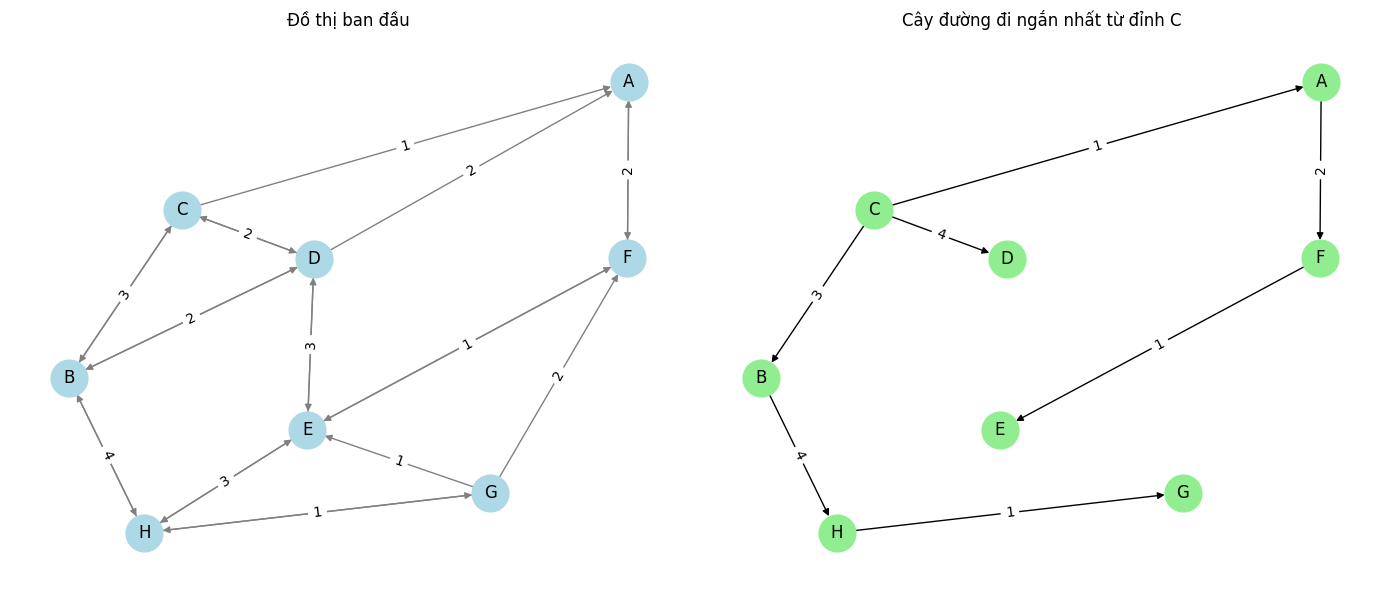

In [3]:
# Vẽ hai đồ thị
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14, 6))

# 1. Đồ thị ban đầu
plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w['weight'] for u, v, w in G.edges(data=True)})
plt.title("Đồ thị ban đầu")

# 2. Cây đường đi ngắn nhất từ C
plt.subplot(1, 2, 2)
nx.draw(T, pos, with_labels=True, node_color='lightgreen', edge_color='black', node_size=700, arrows=True)
nx.draw_networkx_edge_labels(T, pos, edge_labels={(u, v): w['weight'] for u, v, w in T.edges(data=True)})
plt.title("Cây đường đi ngắn nhất từ đỉnh C")

plt.tight_layout()
plt.show()